#  Analysis of Built Environment Factors on the Severity of Traffic Accidents in Birmingham, UK

2928972B
11/03/2024

## Introduction

Transport for London, in a recent report on the inequality in road danger (Transport for London, 2023), analyzed and found that aside from demographic factors such as sex, age, and mode of transport, deprivation also has a significant impact on the casualty risk rate and casualty location in London. They stated that further analysis is required at the local lower super output area level to understand the correlations of collisions in more depth to inform transport and public health, policing, and other stakeholders for better data-driven planning and prioritization of investment. Mapping this from the particular (London) to the general (UK), this analysis seeks to examine the contributing built environment factors that increase the likelihood of the severity of a road collision in Birmingham, England's worst-performing area. 

Birmingham is the local authority area in England with the highest number of deprived Lower Layer Super Output Areas (LSOAs), falling within decile 1 of the Living Environment Deprivation Domain. This domain assesses the quality of the local environment in terms of housing, air quality, and road traffic accidents (Ministry of Housing, Communites and Local Government, 2019). Deciles are determined by ranking the 32,844 neighborhoods in England based on their level of deprivation, then dividing them into 10 equal groups. Each group contains approximately 3,284 or 3,285 neighborhoods. These deciles span from the most deprived 10% of neighborhoods nationally to the least deprived 10%, with decile 1 representing the most deprived 10%.

Road safety continues to be a major crisis in the UK with the far fetched vision zero, and in response to this, this analysis seeks to identify the built environment factors contributing to the severity of road crashes in the UK. It utilizes data from the official UK government road safety website, which provides open-source information on collisions that occurred in 2022. The dataset includes detailed road safety data specifically related to personal injury collisions on public roads, which are reported to the police and subsequently recorded. This dataset contains all the non-sensitive fields that can be made public. The original dataset comprises 36 variables and 106,004 observations, all from the same year.

As research questions, this analysis attempts to answer the following:

- What is the most common severity of crashes in this locality?
- How is the severity distributed for each built environment factor?
- What are the streets where these collisions are happening?
F- inally, building and running a binomial logit model of the severity of a crash based on built environment factors to understand how they each contribute to the likelihood of a crash being serious?


## Data Understanding and Exploration

The data collected specified the spatial details of the collision, the severity, number of casualties, the road types, road segment characteristics, lighting, pedestrian crossing facilities, region of location either urban or rural and so on. The data is then loaded and inspected to view the data types and missing values if any. Following this, as Birmingham is the area of focus, a subset of the data set is created for collisions that happened in Birmingham. 




In [93]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import os
import string
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx



In [32]:
!pip install contextily


Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Obtaining dependency information for contextily from https://files.pythonhosted.org/packages/d2/84/dbcd682289fe8fa3f7c16318e06a7626608f767a9a163954df58f245adef/contextily-1.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for mercantile from https://files.pythonhosted.org/packages/b2/d6/de0cc74f8d36976aeca0dd2e9cbf711882ff8e177495115fd82459afdc4d/mercantile-1.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for rasterio from https://files.pythonhosted.org/packages/b3/0f/e7f21b87636029955ab4e0e81027dc491d99c2b6215e68c6d8f38e5291b3/rasterio-1.3.9-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/9f/5a/a26132406f1f40cf51ea349a5f11b0a46cec02a2031ff82e391c2537247a/geographic

In [94]:
#Loading and inspecting the data to identify the useful variables for the analysis

#importing the data set
# URL of the CSV file
url = "https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-collision-2022.csv"

# Read the CSV file into a DataFrame
dfo = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(dfo.head())

for column in dfo.columns:
    print(column, dfo[column].unique())
    
print(dfo.dtypes)

for column in dfo.columns:
    mixed_types = dfo[column].apply(type).eq(str).any()
    if mixed_types:
        print(f"Column '{column}' has mixed types.")
        
#number of observations       
len(dfo)

# Check for missing values
print("Missing values:\n", dfo.isnull().sum())

# Descriptive statistics for numerical columns
print("Descriptive statistics:\n", dfo.describe())



C:\Users\Admin\AppData\Local\Temp\ipykernel_14060\3599894208.py:8: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  dfo = pd.read_csv(url)


  accident_index  accident_year accident_reference  location_easting_osgr  \
0  2022010352073           2022           10352073               525199.0   
1  2022010352573           2022           10352573               546214.0   
2  2022010352575           2022           10352575               551119.0   
3  2022010352578           2022           10352578               528889.0   
4  2022010352580           2022           10352580               539773.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                177928.0  -0.198224  51.486454             1   
1                179866.0   0.105042  51.498830             1   
2                174789.0   0.173482  51.451924             1   
3                192230.0  -0.139873  51.614153             1   
4                190404.0   0.016495  51.595151             1   

   accident_severity  number_of_vehicles  ...  \
0                  3                   2  ...   
1                  3                   2  ...   

Column 'accident_index' has mixed types.
Column 'accident_reference' has mixed types.
Column 'date' has mixed types.
Column 'time' has mixed types.
Column 'local_authority_ons_district' has mixed types.
Column 'local_authority_highway' has mixed types.
Column 'lsoa_of_accident_location' has mixed types.
Missing values:
 accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          22
location_northing_osgr                         22
longitude                                      22
latitude                                       22
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                        

In [95]:
#Select observations in Birmingham, that is where 'local_authority_ons_district' = 'E08000025'
df = dfo[dfo['local_authority_ons_district'] == 'E08000025']

len(df)

2383

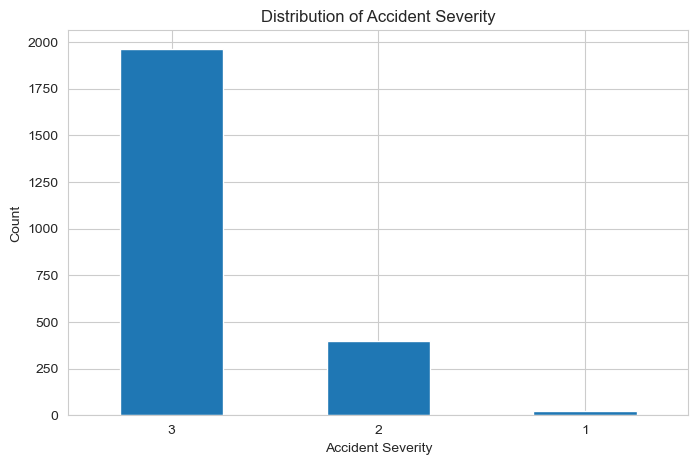

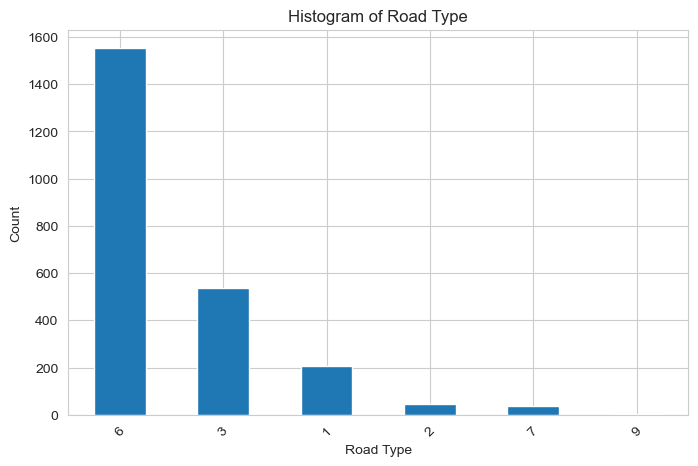

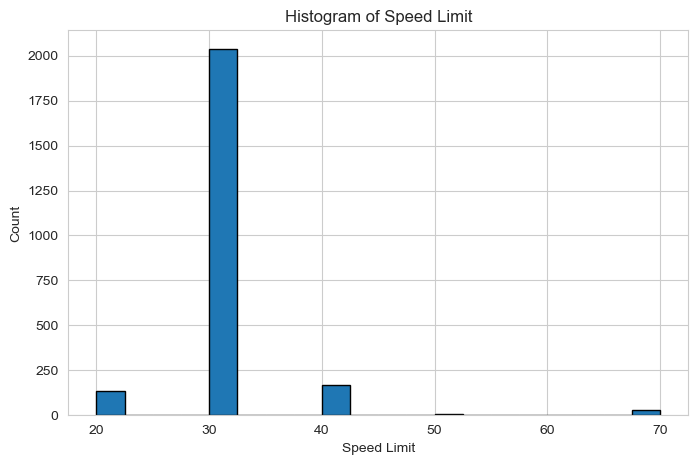

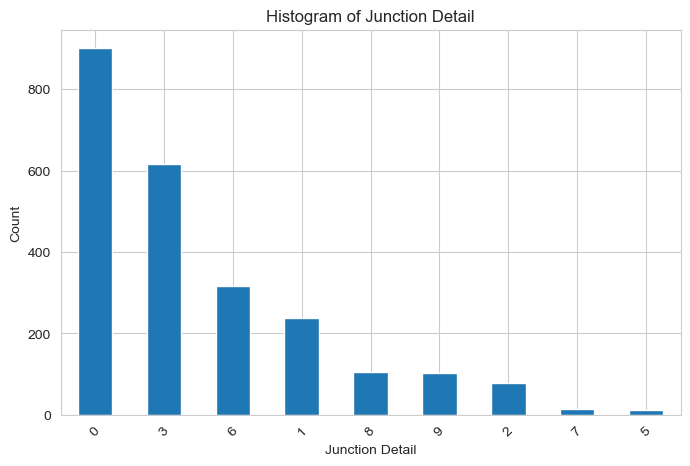

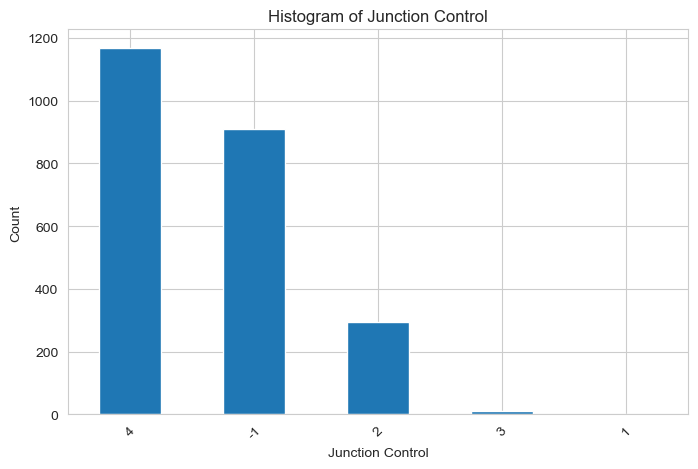

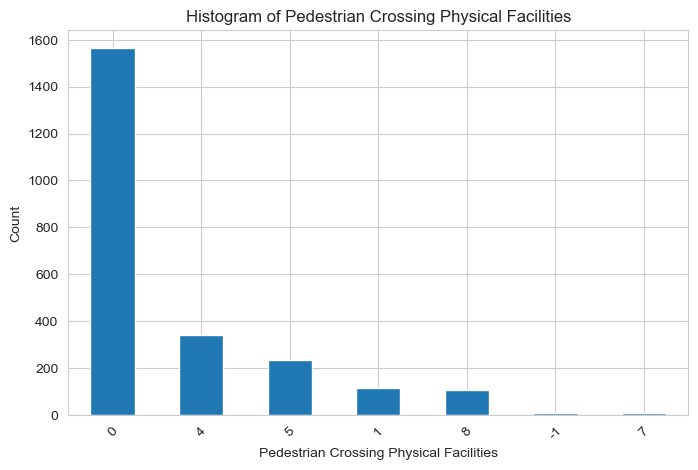

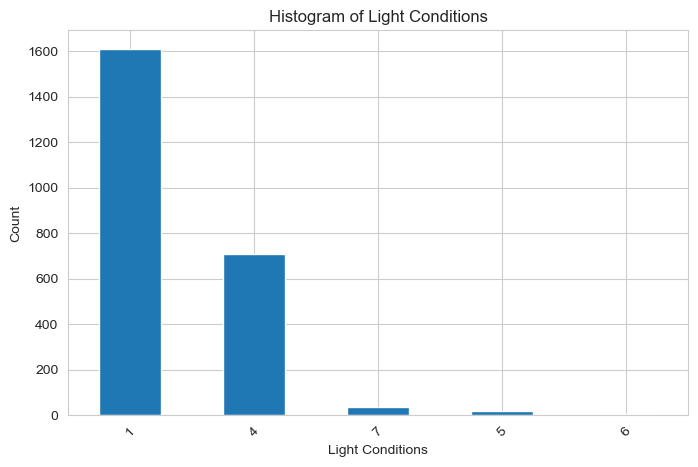

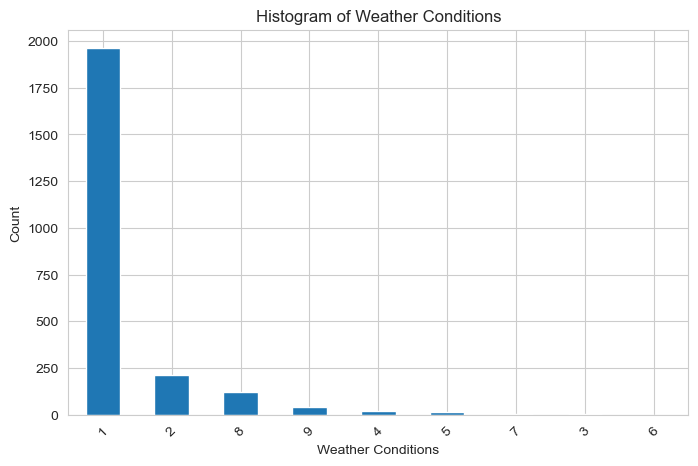

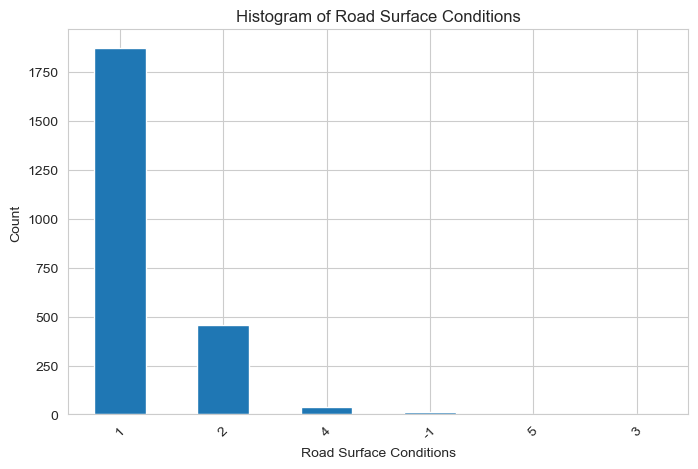

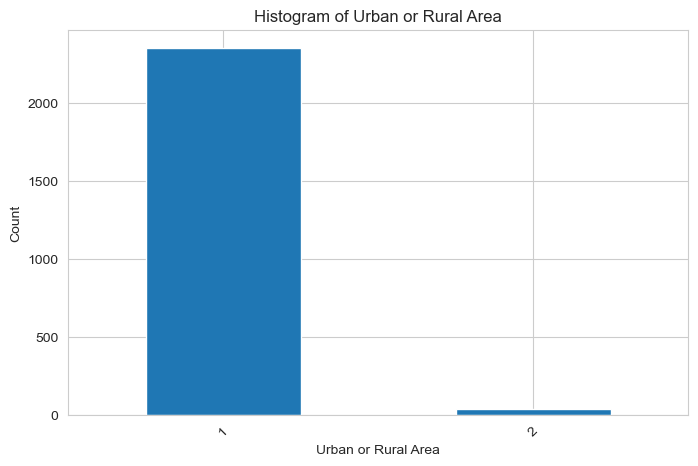

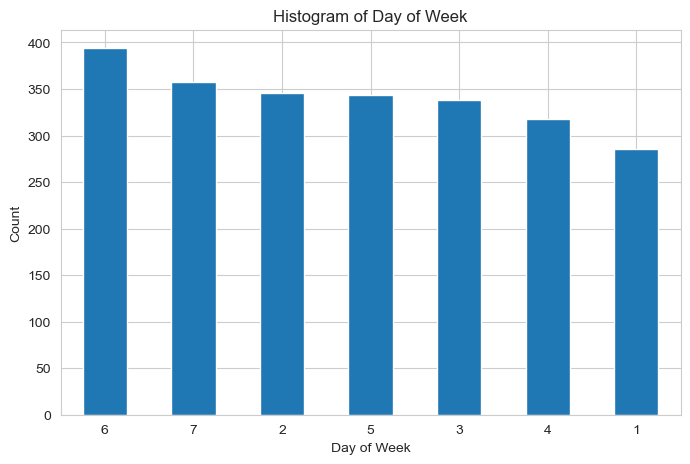

In [96]:
# Perform exploratory data analysis (EDA)

# Histogram for 'accident_severity'
plt.figure(figsize=(8, 5))
df['accident_severity'].value_counts().plot(kind='bar')
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()   #bulk of the data are slight and serious collisions, because the number of observations in the fatal group are very little we will merge it to form two levels, 2 and 3 only serious and slight injuries with fatal being merged with the serious injuries. 



# Histogram for 'road_type'
plt.figure(figsize=(8, 5))
df['road_type'].value_counts().plot(kind='bar')
plt.title('Histogram of Road Type')
plt.xlabel('Road Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()  #None of the observations have missing values, change unknown (9) to na. In feature engineering change to categorical data and change to their real names
#do descriptive statistics in pecentage format

# Histogram for 'speed_limit'
plt.figure(figsize=(8, 5))
plt.hist(df['speed_limit'], bins=20, edgecolor='black')
plt.title('Histogram of Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('Count')
plt.show()  #clean data, but few observations from 50+, will be combined to one variable subsequently. Also traeted as categorical as this is a characteristics of the road not the speed at which the vehicle was riding. 

# Histogram for 'junction_detail'
plt.figure(figsize=(8, 5))
df['junction_detail'].value_counts().plot(kind='bar')
plt.title('Histogram of Junction Detail')
plt.xlabel('Junction Detail')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()  #no missing values 

# Histogram for 'junction_control'
plt.figure(figsize=(8, 5))
df['junction_control'].value_counts().plot(kind='bar')
plt.title('Histogram of Junction Control')
plt.xlabel('Junction Control')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()   # alot of data is coded as data missing and out of range, however, we cant exclude observations with this as it forms a great bulk of the data set
#will not be included in model, intuitively seems to have lots of data recording error

# Histogram for 'pedestrian_crossing_physical_facilities'
plt.figure(figsize=(8, 5))
df['pedestrian_crossing_physical_facilities'].value_counts().plot(kind='bar')
plt.title('Histogram of Pedestrian Crossing Physical Facilities')
plt.xlabel('Pedestrian Crossing Physical Facilities')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()   #unknown and missing data,all will be changed to na during data cleaning step. data is unevenly distributed that is category 0 having more than 50% of the observations

# Histogram for 'light_conditions'
plt.figure(figsize=(8, 5))
df['light_conditions'].value_counts().plot(kind='bar')
plt.title('Histogram of Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show() #ok

# Histogram for 'weather_conditions'
plt.figure(figsize=(8, 5))
df['weather_conditions'].value_counts().plot(kind='bar')
plt.title('Histogram of Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show() #some values are unknown, to be changed to na

# Histogram for 'road_surface_conditions'
plt.figure(figsize=(8, 5))
df['road_surface_conditions'].value_counts().plot(kind='bar')
plt.title('Histogram of Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()  #some values are missing and unknown, to be changed to na

# Histogram for 'urban_or_rural_area'
plt.figure(figsize=(8, 5))
df['urban_or_rural_area'].value_counts().plot(kind='bar')
plt.title('Histogram of Urban or Rural Area')
plt.xlabel('Urban or Rural Area')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()  #Ok, majority of data is urban as Birmingham is mostly an urban area

# Histogram for 'day_of_week'
plt.figure(figsize=(8, 5))
df['day_of_week'].value_counts().plot(kind='bar')
plt.title('Histogram of Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show() #most collisions happen on a friday and then saturday and the least on sunday, yes roads on sundays are less busy


## Data Cleaning
Based on a review of past literature on similar topics, given that this analysis focuses on built evironment factors and with the available data, we choose to work with the variables below: 
- Speed limit: to capture the speed limits that have to be reviewed on roads
- junction details : to capture which type of junctions should be prioritised in road safety interventions
- Light conditions : how much the period of the day relates to the severity of crashes
- Weather Conditions : building infrastructures resilient to this and also inform campaigns for target groups driving in these conditions
- Pedestrian crossing facilities : which is best in reducing the severity of collisions 

The following major changes were made: 
- fatal and serious level o severity were combined to a single class names serious hence two classes, serious and slight
- speed limits were maintained except for those 50 and above that were combined to one class 50+ as they had very few observation sin their respective groups
- The junction detail were changed to 3 main classes, 0: 'Not at junction or within 20 metres', 'Roundabout' and 'Intersection' 
- All the variables were changed to categorical variables

In [97]:
#a new data set with the interested variable only
selected_variables = ['accident_reference', 'accident_severity', 'speed_limit', 'junction_detail', 'pedestrian_crossing_physical_facilities', 
                      'light_conditions', 'weather_conditions']

# Create a subset DataFrame containing only the selected variables
df2 = df[selected_variables].copy()

# Display the subset DataFrame
print(df2)

      accident_reference  accident_severity  speed_limit  junction_detail  \
46396          201133252                  2           30                3   
46397          201133292                  1           40                0   
46404          201136534                  2           30                6   
46410          201139256                  2           40                6   
46411          201140047                  3           30                3   
...                  ...                ...          ...              ...   
51323          201321846                  3           30                3   
51326          201323847                  2           30                0   
51329          201325121                  3           40                0   
51331          201325190                  3           30                1   
51332          201325200                  3           30                3   

       pedestrian_crossing_physical_facilities  light_conditions  \
46396  

In [98]:
#After visualising, we proceed to cleaning proper. The selected variables for our analysis are 

#1) For accident severity, we shall merge 1 and 2 to serious and 3 as slight, chnaging the names as well as from interger to categorical

replacement_dict = {1: 'serious', 2: 'serious', 3: 'slight'}

# Step 1: Replace multiple values
df2.loc[:, 'accident_severity'] = df2['accident_severity'].replace(replacement_dict)

# Step 2: Change data type to categorical
df2.loc[:, 'accident_severity'] = pd.Categorical(df2['accident_severity'], categories=['serious', 'slight'], ordered=False)


#2) For speed limit, we change to categorical since these values are fixed values set as road charateristics rather than values at which the vehicles are moving. Also, we want to carry out an analysis for the various groups rather than perform mathematical operations

replacement_dicta = {20: '20', 30: '30', 40: '40', 50: '50', 60: '60', 70: '70'}

# Replace values of speed_limit according to the replacement dictionary
df2['speed_limit'] = df2['speed_limit'].replace(replacement_dicta)

# Define the categories for the speed limit
categories = ['20', '30', '40', '50', '60', '70']

# Convert speed_limit to categorical with specified categories
df2['speed_limit'] = pd.Categorical(df2['speed_limit'], categories=categories)


#3) For junction detail, 
# Replace values, 0	Not at junction or within 20 metres
replacement_dict3 = {
    0: 'Not at junction or within 20 metres',
    1: 'Roundabout', #originally coded as roundabout
    2: 'Mini-roundabout', #originally coded as Mini-roundabout
    3: 'T or staggered junction', #originally coded as T or staggered junction
    5: 'Slip road', #originally coded as Slip road
    6: 'Crossroads', #originally coded as Crossroads
    7: 'More than 4 arms (not roundabout)', #originally coded as More than 4 arms (not roundabout)
    8: 'NPrivate drive or entrance', #originally coded as Private drive or entrance
    9: 'Other junction', #originally coded as Other junction
    99: 'unknown (self reported)',  #originally coded as unknown (self reported)
    -1: np.nan   # Change 'Data missing or out of range' to 'n.a' #originally coded as Data missing or out of range
}
df2['junction_detail'] = df2['junction_detail'].replace(replacement_dict3)

# Change to categorical
df2['junction_detail'] = pd.Categorical(df2['junction_detail'])


#4) For pedestrian crossing facility
# Replace values
replacement_dict4 = {
    0: 'No physical crossing facilities within 50 metres',
    1: 'Zebra',
    4: 'Pelican, puffin, toucan or similar non-junction pedestrian light crossing',
    5: 'Pedestrian phase at traffic signal junction',
    7: 'Footbridge or subway',
    8: 'Central refuge',
    -1: np.nan,  # Change 'Data missing or out of range' to null
    9: np.nan    # Change 'unknown (self reported)' to null
}
df2['pedestrian_crossing_physical_facilities'] = df2['pedestrian_crossing_physical_facilities'].replace(replacement_dict4)

# Change to categorical
df2['pedestrian_crossing_physical_facilities'] = pd.Categorical(df2['pedestrian_crossing_physical_facilities'])


#6) For lighting conditions,
# Replace values
replacement_dict5 = {
    1: 'Daylight',
    4: 'Darkness - lights lit',
    5: 'Darkness - lights unlit',
    6: 'Darkness - no lighting',
    7: np.nan,  # Change 'Darkness - lighting unknown' to null
    -1: np.nan  # Change 'Data missing or out of range' to null
}
df2['light_conditions'] = df2['light_conditions'].replace(replacement_dict5)

# Change to categorical
df2['light_conditions'] = pd.Categorical(df2['light_conditions'])


#7) For weather conditions,
# Replace values
replacement_dict6 = {
    1: 'Fine no high winds',
    2: 'Raining no high winds',
    3: 'Snowing no high winds',
    4: 'Fine + high winds',
    5: 'Raining + high winds',
    6: 'Snowing + high winds',
    7: 'Fog or mist',
    8: 'Other',
    -1: np.nan,  # Change 'Data missing or out of range' to null
    9: np.nan  # Change 'Unknown' to null
}
df2['weather_conditions'] = df2['weather_conditions'].replace(replacement_dict6)

# Change to categorical
df2['weather_conditions'] = pd.Categorical(df2['weather_conditions'])


print(df2)

      accident_reference accident_severity speed_limit  \
46396          201133252           serious          30   
46397          201133292           serious          40   
46404          201136534           serious          30   
46410          201139256           serious          40   
46411          201140047            slight          30   
...                  ...               ...         ...   
51323          201321846            slight          30   
51326          201323847           serious          30   
51329          201325121            slight          40   
51331          201325190            slight          30   
51332          201325200            slight          30   

                           junction_detail  \
46396                         Intersection   
46397  Not at junction or within 20 metres   
46404                         Intersection   
46410                         Intersection   
46411                         Intersection   
...                        

## Spatial visualisation

To visualise where these collisions were happening, a spatial representation was produced as shown below represented on the open street map. There is a concentration of collisions at Birmingham centre which could be due to the high number of daily traffic here as well. For better understanding, a normalisation could be done using Average Annual Daily Traffic across the area or the various streets for better inerpretation; this is a recommendatin for further analysis.

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


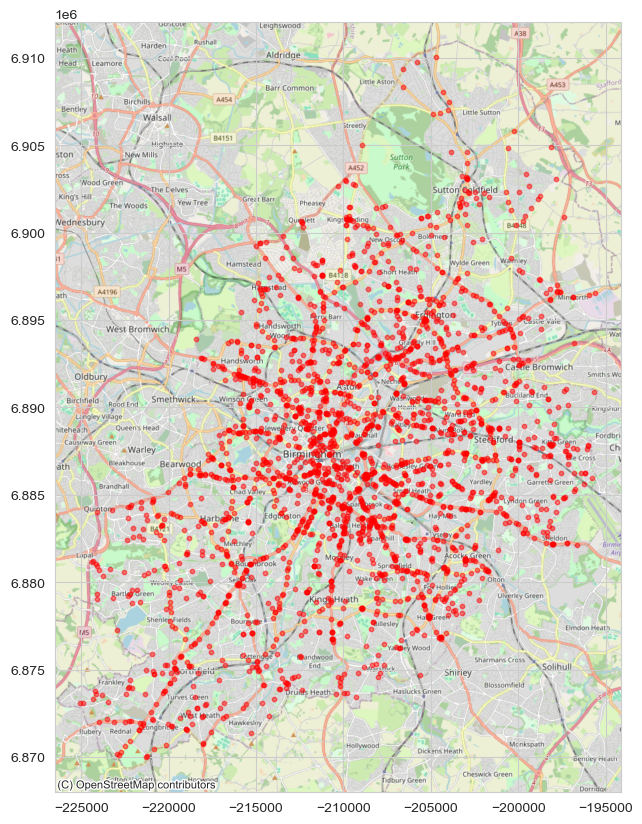

In [99]:
# Convert DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
crs = {'init': 'epsg:4326'}  # Coordinate reference system
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

import contextily as ctx

# Plot the GeoDataFrame on OpenStreetMap
ax = gdf.to_crs(epsg=3857).plot(figsize=(10, 10), markersize=10, color='red', alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()


G:\UofG20232024\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\contextily\tile.py:623: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


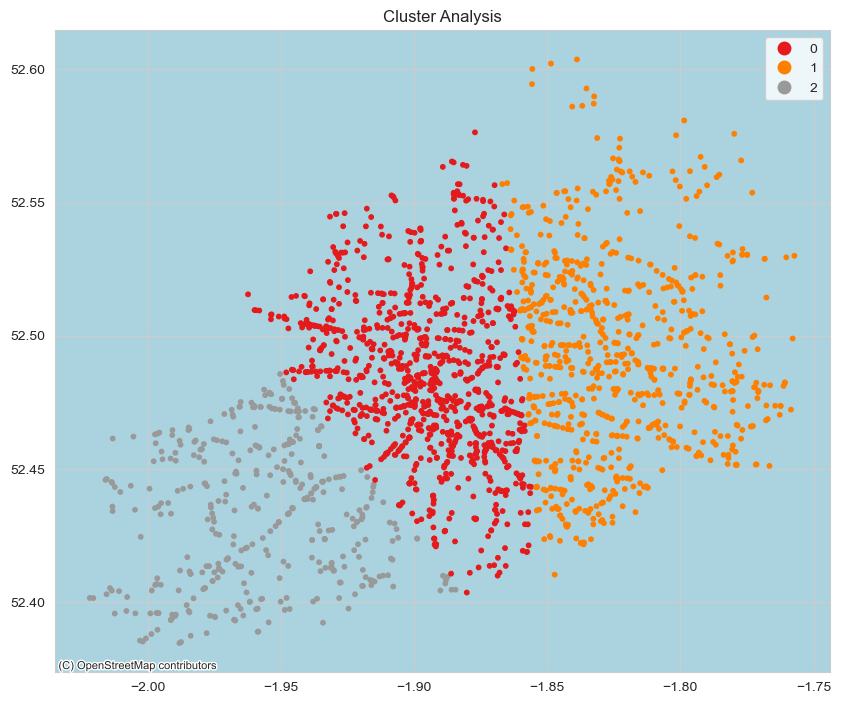

In [100]:
from sklearn.cluster import KMeans

# Extract the latitude and longitude coordinates from the GeoDataFrame
coordinates = gdf[['latitude', 'longitude']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
gdf['cluster'] = kmeans.fit_predict(coordinates)

# Plot the clusters
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='cluster', categorical=True, legend=True, ax=ax, cmap='Set1', markersize=10)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title('Cluster Analysis')
plt.show()


## Exploratory Data Analysis

Interprete

In [101]:
# Iterate over each variable except 'accident_reference' and 'accident_severity'
for variable in selected_variables[2:]:
    # Group by the current variable and accident severity, then count occurrences
    grouped = df2.groupby([variable, 'accident_severity']).size().unstack(fill_value=0)
    
    # Calculate total count for each category
    grouped['Total'] = grouped.sum(axis=1)
    
    # Calculate percentage of each accident severity category within each variable category
    grouped['serious_percentage'] = (grouped['serious'] / grouped['Total']) * 100
    grouped['slight_percentage'] = (grouped['slight'] / grouped['Total']) * 100
    
    # Format the DataFrame for display
    formatted_grouped = grouped[['Total', 'serious_percentage', 'slight_percentage']].copy()
    formatted_grouped.index.name = variable
    formatted_grouped.columns.name = 'Accident Severity'
    
    # Apply styling to highlight the maximum value in each column
    styled_grouped = formatted_grouped.style.highlight_max(axis=0)
    
    # Display the styled DataFrame
    print(f"Styled DataFrame for {variable}:")
    display(styled_grouped)
    print()  # Print an empty line for better readability


Styled DataFrame for speed_limit:


Accident Severity,Total,serious_percentage,slight_percentage
speed_limit,,,
20,136,22.794118,77.205882
30,2039,17.508583,82.491417
40,166,16.265060,83.734940
50+,42,7.142857,92.857143



Styled DataFrame for junction_detail:


Accident Severity,Total,serious_percentage,slight_percentage
junction_detail,,,
Intersection,1060,17.075472,82.924528
Not at junction or within 20 metres,1007,19.960278,80.039722
Roundabout,316,11.392405,88.607595



Styled DataFrame for pedestrian_crossing_physical_facilities:


Accident Severity,Total,serious_percentage,slight_percentage
pedestrian_crossing_physical_facilities,,,
Central refuge,108,19.444444,80.555556
Footbridge or subway,9,22.222222,77.777778
No physical crossing facilities within 50 metres,1563,18.490083,81.509917
Pedestrian phase at traffic signal junction,233,12.446352,87.553648
"Pelican, puffin, toucan or similar non-junction pedestrian light crossing",343,17.492711,82.507289
Zebra,117,13.675214,86.324786



Styled DataFrame for light_conditions:


Accident Severity,Total,serious_percentage,slight_percentage
light_conditions,,,
Darkness - lights lit,708,21.186441,78.813559
Darkness - lights unlit,21,23.809524,76.190476
Darkness - no lighting,7,28.571429,71.428571
Daylight,1610,15.900621,84.099379



Styled DataFrame for weather_conditions:


Accident Severity,Total,serious_percentage,slight_percentage
weather_conditions,,,
Fine + high winds,20,25.000000,75.000000
Fine no high winds,1962,17.533129,82.466871
Fog or mist,5,40.000000,60.000000
Other,123,16.260163,83.739837
Raining + high winds,16,18.750000,81.250000
Raining no high winds,211,19.905213,80.094787
Snowing + high winds,1,0.000000,100.000000
Snowing no high winds,2,0.000000,100.000000


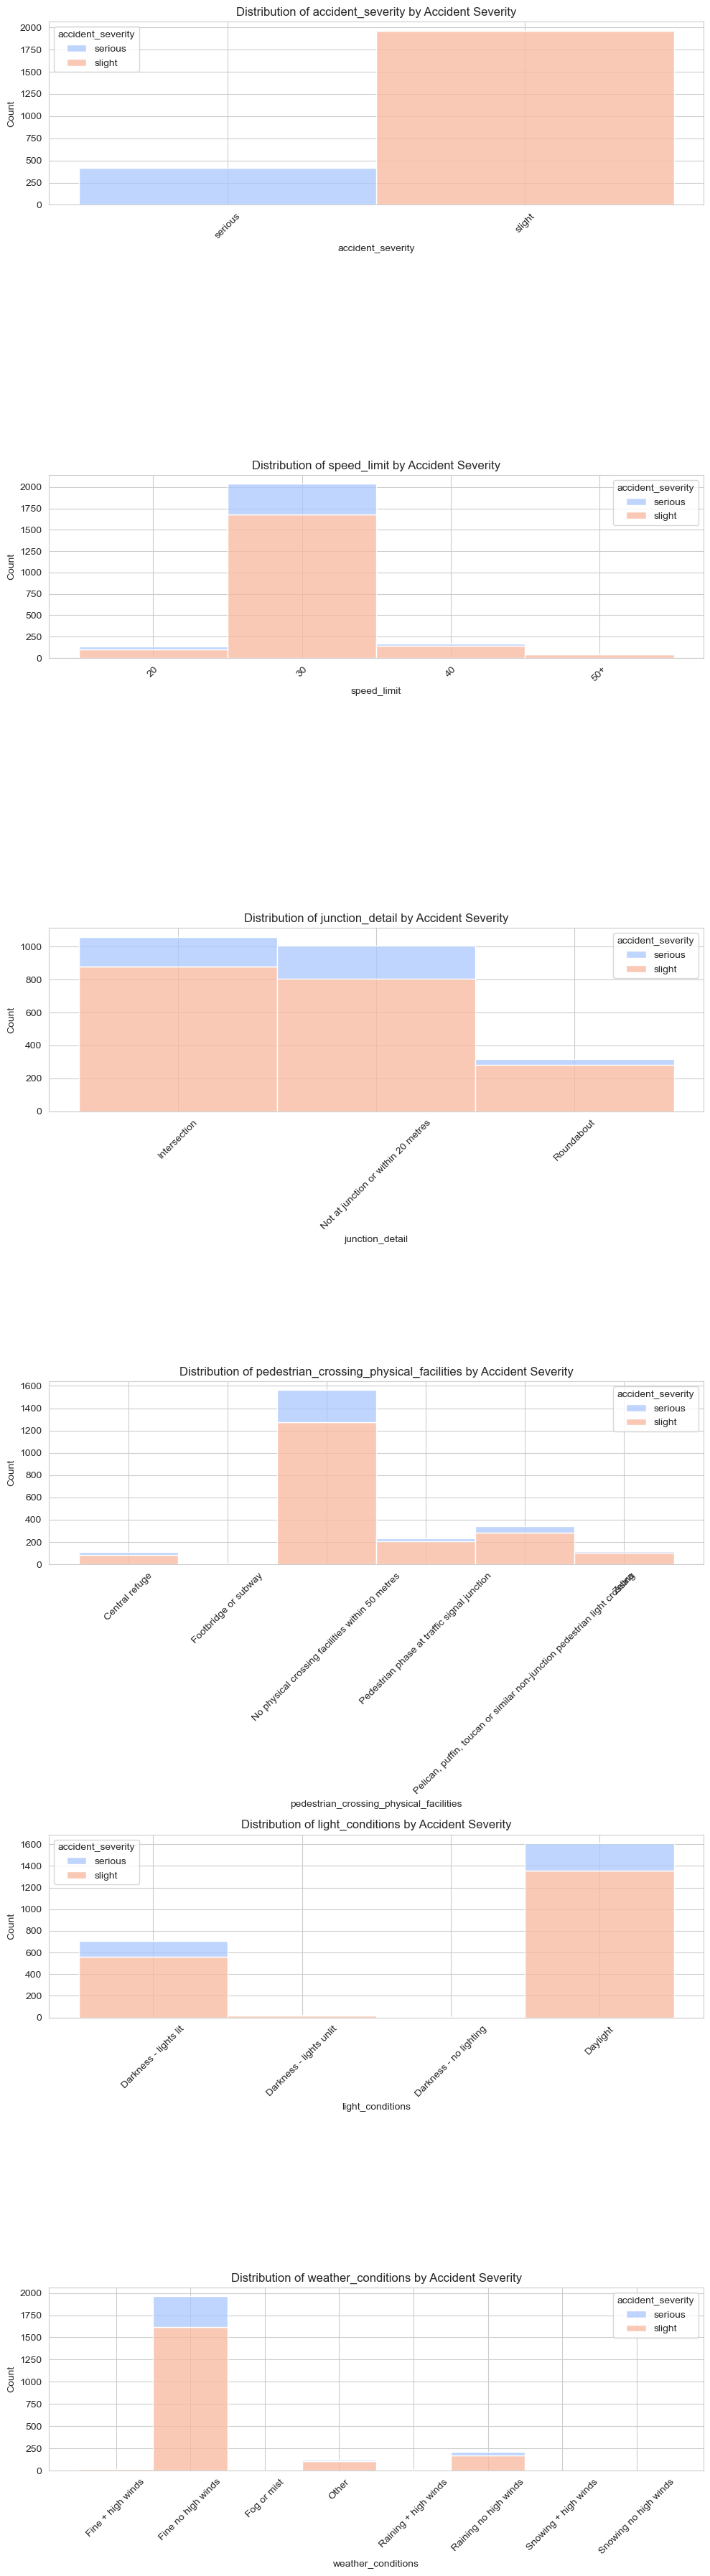

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("whitegrid")

# Create subplots for each variable
fig, axes = plt.subplots(nrows=len(selected_variables) - 1, ncols=1, figsize=(10, 6*(len(selected_variables) - 1)))

# Loop through each variable (excluding 'accident_reference') and create stacked histograms
for i, variable in enumerate(selected_variables[1:]):  # Exclude 'accident_reference'
    ax = sns.histplot(data=df2, x=variable, hue='accident_severity', multiple='stack', ax=axes[i], palette='coolwarm')
    ax.set_title(f'Distribution of {variable} by Accident Severity')
    ax.set_xlabel(variable)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()



## Binary Logistic Regression Model

The binary logit model will be build to predict the odds of a collision being serious or slight (dependent variable is accident sevrity) based on the indepenedent variables of speed limit, junction dteails, light conditions, weather conditions and pedestrian crossing physical facilities. 

This methodology is used to predict the probability of belonging to a category in a dependent variable based on numerous independent variables.The dependent variable has only one binary option where one of the categories is taken as the reference category. 

The equation for binary logistic regression (logit model) is:

\[
\text{logit}(p) = \ln \left( \frac{p}{1-p} \right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n
\]

Where:
- \( p \) is the probability of the event happening (dependent variable)
- \( X_1, X_2, \ldots, X_n \) are the independent variables
- \( \beta_0, \beta_1, \ldots, \beta_n \) are the coefficients of the independent variables
- \( \text{logit}(p) \) is the natural logarithm of the odds of \( p \) occurring


In [103]:
# Loop through the categorical variables and perform one-hot encoding
for var in ['speed_limit', 'junction_detail', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions']:
    cat_list = pd.get_dummies(df2[var], prefix=var)
    df2 = df2.join(cat_list)

# Drop the original categorical variables
df2.drop(columns=['speed_limit', 'junction_detail', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions'], inplace=True)

# Display the resulting DataFrame
print(df2)


      accident_reference accident_severity  speed_limit_20  speed_limit_30  \
46396          201133252           serious           False            True   
46397          201133292           serious           False           False   
46404          201136534           serious           False            True   
46410          201139256           serious           False           False   
46411          201140047            slight           False            True   
...                  ...               ...             ...             ...   
51323          201321846            slight           False            True   
51326          201323847           serious           False            True   
51329          201325121            slight           False           False   
51331          201325190            slight           False            True   
51332          201325200            slight           False            True   

       speed_limit_40  speed_limit_50+  junction_detail_Interse

In [104]:
# Define the mapping dictionary
severity_mapping = {'serious': 1, 'slight': 0}

# Apply the mapping to the 'accident_severity' column
df2['accident_severity_numeric'] = df2['accident_severity'].map(severity_mapping)

print(df2)

      accident_reference accident_severity  speed_limit_20  speed_limit_30  \
46396          201133252           serious           False            True   
46397          201133292           serious           False           False   
46404          201136534           serious           False            True   
46410          201139256           serious           False           False   
46411          201140047            slight           False            True   
...                  ...               ...             ...             ...   
51323          201321846            slight           False            True   
51326          201323847           serious           False            True   
51329          201325121            slight           False           False   
51331          201325190            slight           False            True   
51332          201325200            slight           False            True   

       speed_limit_40  speed_limit_50+  junction_detail_Interse

In [105]:
# Drop the 'accident_severity' column from df2
df2.drop(columns=['accident_severity'], inplace=True)


In [107]:
# Drop the 'accident_severity' column from df2
df2.drop(columns=['accident_reference'], inplace=True)

In [108]:
df2.columns.values

array(['speed_limit_20', 'speed_limit_30', 'speed_limit_40',
       'speed_limit_50+', 'junction_detail_Intersection',
       'junction_detail_Not at junction or within 20 metres',
       'junction_detail_Roundabout',
       'pedestrian_crossing_physical_facilities_Central refuge',
       'pedestrian_crossing_physical_facilities_Footbridge or subway',
       'pedestrian_crossing_physical_facilities_No physical crossing facilities within 50 metres',
       'pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction',
       'pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing',
       'pedestrian_crossing_physical_facilities_Zebra',
       'light_conditions_Darkness - lights lit',
       'light_conditions_Darkness - lights unlit',
       'light_conditions_Darkness - no lighting',
       'light_conditions_Daylight',
       'weather_conditions_Fine + high winds',
       'weather_conditions_Fine no high 

In [109]:
print(df2)

       speed_limit_20  speed_limit_30  speed_limit_40  speed_limit_50+  \
46396           False            True           False            False   
46397           False           False            True            False   
46404           False            True           False            False   
46410           False           False            True            False   
46411           False            True           False            False   
...               ...             ...             ...              ...   
51323           False            True           False            False   
51326           False            True           False            False   
51329           False           False            True            False   
51331           False            True           False            False   
51332           False            True           False            False   

       junction_detail_Intersection  \
46396                          True   
46397                         Fal

In [110]:
# Convert boolean dummy variables to binary (0 and 1)
df_encoded_numeric = df2.astype(int)

# Now 'df_encoded_numeric' will have binary numeric columns


In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define independent and dependent variables
X = df2.drop(columns=[ 'accident_severity_numeric'])
y = df2['accident_severity_numeric']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the logistic regression model
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)



LogisticRegression()

In [114]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.453406
         Iterations: 35


G:\UofG20232024\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                                               Results: Logit
Model:                                               Logit                                                      Method:                                            MLE       
Dependent Variable:                                  accident_severity_numeric                                  Pseudo R-squared:                                  0.024     
Date:                                                2024-03-27 19:44                                           AIC:                                               2208.9351 
No. Observations:                                    2383                                                       BIC:                                               2347.5619 
Df Model:                                            23                                                         Log-Likelihood:                                    -1080.5   
Df Residuals:                       

In [116]:
# Get odds ratios
odds_ratios = np.exp(result.params)

# Print the odds ratios
print("Odds Ratios:")
print(odds_ratios)


Odds Ratios:
speed_limit_20                                                                                                       2.912717e-01
speed_limit_30                                                                                                       2.123571e-01
speed_limit_40                                                                                                       1.948949e-01
speed_limit_50+                                                                                                      5.798949e-02
junction_detail_Intersection                                                                                         9.906652e-02
junction_detail_Not at junction or within 20 metres                                                                  1.210280e-01
junction_detail_Roundabout                                                                                           5.830444e-02
pedestrian_crossing_physical_facilities_Central refuge                       

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define independent variables (X) and dependent variable (y)
X = df2.drop(columns=['accident_severity_numeric'])
y = df2['accident_severity_numeric']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy))


Accuracy of logistic regression classifier on test set: 0.81


In [125]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[387   0]
 [ 90   0]]


In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       387
           1       0.00      0.00      0.00        90

    accuracy                           0.81       477
   macro avg       0.41      0.50      0.45       477
weighted avg       0.66      0.81      0.73       477



G:\UofG20232024\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\UofG20232024\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\UofG20232024\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


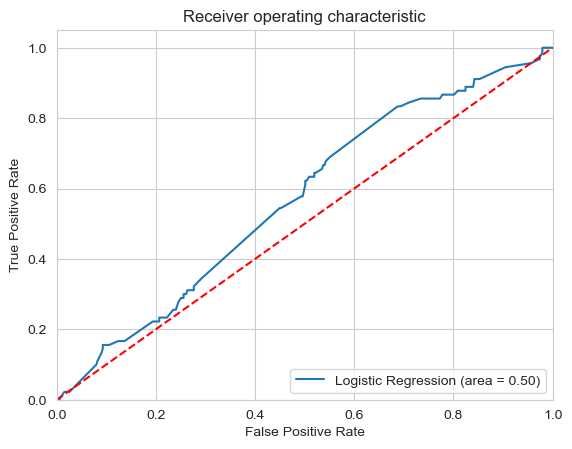

In [126]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()